# Zomato Restraunts Analysis


The dataset source is from kaggle:https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants.

The initial step is to install or download the dataset. The dataset gives us information about various restraunts located in the city bangalore.

In [65]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [66]:
import opendatasets as opd

In [67]:
dataset ='https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants'

In [68]:
opd.download(dataset)

Skipping, found downloaded files in ".\zomato-bangalore-restaurants" (use force=True to force download)


In [69]:
import os

In [70]:
data_dir = '.\zomato-bangalore-restaurants'

In [71]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [72]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd

In [74]:
zomato_df = pd.read_csv('zomato.csv')

In [75]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Other liberaries required for the data manipulation and visualization

In [76]:
!pip install matplotlib
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('Solarize_Light2')


To know more about the structure and value datatype of the dataset

In [77]:
zomato_df.shape

(51717, 17)

 The dataset consititutes of 51717 rows and 17 columns
 

In [78]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

We can observe that there are certain difference in the count values of columns indicating presence of null or missing values

### Cleaning the data

Lets get the list of columns 

In [79]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

We can drop certain columns from this dataset, as they are not required for our analysis

In [80]:
zomato_df = zomato_df.drop(['url', 'address','phone','reviews_list','menu_item','dish_liked'], axis =1)
#axis = 1 for columns and axis=0 for rows

In [81]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### Rate column

In the rate column the prefernce value format would be float i.e. 4.1 rather than 4.1/5, so lets start identifying all the unique values in the rate column

In [82]:
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can certain values such as 'NEW','-' and NULL values dont follow our requiremnt.

This values are converted to our desired requirement by creating a function known as clean_rate.


In [83]:
def clean_rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0] #choosing the zero index part of the vlaue i.e. '4.1' '/' '5' we choose only 4.1
        return float(value)
    
#applying the function
zomato_df['rate'] = zomato_df['rate'].apply(clean_rate)

zomato_df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

#### Replace null values with mean rate value

Replacing null values with the mean can be a reasonable approach, particularly when the missing data is assumed to be missing at random and the mean is a representative measure of the column's central tendency.Using the mean as a replacement helps to preserve the central tendency of the data, ensuring that the overall distribution is not significantly affected.

The total number of null value in rate column is:

In [84]:
zomato_df.rate.isnull().sum()

10052

Now lets replace the null value with the mean of rate column

In [85]:
zomato_df['rate'].fillna(zomato_df['rate'].mean(), inplace = True)


In [86]:
zomato_df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [87]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


We can observe that there are very few null values in columns location, rest_type and cuisines but they are not significant in number, hence we can remove the null values.

In [88]:
zomato_df.dropna(inplace = True)

In [89]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51148 non-null  object 
 1   online_order                 51148 non-null  object 
 2   book_table                   51148 non-null  object 
 3   rate                         51148 non-null  float64
 4   votes                        51148 non-null  int64  
 5   location                     51148 non-null  object 
 6   rest_type                    51148 non-null  object 
 7   cuisines                     51148 non-null  object 
 8   approx_cost(for two people)  51148 non-null  object 
 9   listed_in(type)              51148 non-null  object 
 10  listed_in(city)              51148 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


let's rename certain columns i.e. approx_cost(for two people) to cost_for_2people and listed_in(type) to type

In [90]:
zomato_df.rename(columns={'approx_cost(for two people)':'cost_for_2people','listed_in(type)':'type'}, inplace = True)
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2people,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Lets find out all the loactions mentioned in this dataset

In [91]:
zomato_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

lets see which all specific part of bangalore is involved in this dataset.

In [92]:
zomato_df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

We can observe that location can be a better representative for location, so we will drop the listed_in(city) column 

In [93]:
zomato_df.drop(['listed_in(city)'], axis=1, inplace= True)

In [94]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


now lets check cost_for_2people column


In [95]:
zomato_df['cost_for_2people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

We can observe that the data type of some of the cost_for_2people value is str probably because of "," so we need to convert it into float datatype, this is done by creating a function i.e. clean_2.

In [96]:
def clean_2(value):
    value=str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
zomato_df['cost_for_2people'] = zomato_df['cost_for_2people'].apply(clean_2)

zomato_df['cost_for_2people'].unique()
    

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [97]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


Now lets consider the rest_type column


In [98]:
zomato_df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

Now lets consider the count of each unique value


In [99]:
zomato_df['rest_type'].value_counts()

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

We can observe that there are lot of rest_type values with very less count so we can cluster to a single group i.e. other and the condition we can give is any value less than 700 counts(i.e. number of hotels in that type). This done by creating a temporary list(rest_types) with value count less than 800 and then creating a function clean_rest.

In [100]:
#the list generated by  zomato_df['rest_type'].value_counts() is stored in rest_type
rest_types = zomato_df['rest_type'].value_counts(ascending = False)
rest_types

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [101]:
rest_types_lessthan800 = rest_types[rest_types < 800]
rest_types_lessthan800

rest_type
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
Lounge                        396
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 84, dtype: int64

In [102]:
# creating a function clean_rest
def clean_rest(value):
    if(value in rest_types_lessthan800):
        return 'others'
    else:
        return value

zomato_df['rest_type'] = zomato_df['rest_type'].apply(clean_rest)
zomato_df['rest_type'].value_counts()

rest_type
Quick Bites           19046
Casual Dining         10273
others                 8163
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Beverage Shop           865
Name: count, dtype: int64

Now lets consdier location column, lets see the unique locations in this dataset

In [103]:
zomato_df['location'].value_counts()

location
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

We can observe there certain values with negligalbe counts so they can be clustered into group 'others'

In [104]:
location = zomato_df['location'].value_counts(ascending = False)
location_less_than300 = location[location < 300 ]

In [105]:
location_less_than300

location
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            216
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Hosur Road                       102
Kaggadasapura                    101
CV Raman Nagar                    90
Vijay Nagar                       78
RT Nagar                     

We create a function clean_loca to cluster the locations with number of restraunts less than 300 into one value 'others' 

In [106]:
def clean_loca(value):
    if(value in location_less_than300):
        return 'others'
    else:
        return value
    
zomato_df['location'] = zomato_df['location'].apply(clean_loca)
zomato_df['location'].value_counts()

location
BTM                      5071
others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
L

In [107]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


Now let's consider cuisines column

In [108]:
zomato_df['cuisines'].value_counts()

cuisines
North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: count, Length: 2704, dtype: int64

In [109]:
cuisines = zomato_df['cuisines'].value_counts()
cuisines_less_than100 = cuisines[cuisines < 100 ]
cuisines_less_than100 

cuisines
North Indian, Continental, Chinese           97
Juices                                       94
Bengali, North Indian                        93
Fast Food, North Indian                      93
Tibetan, Momos                               90
                                             ..
Beverages, Burger                             1
North Indian, Mughlai, Lucknowi               1
Continental, Thai, North Indian, Chinese      1
North Indian, Bengali, Chinese, Beverages     1
North Indian, Chinese, Arabian, Momos         1
Name: count, Length: 2635, dtype: int64

Creating a function clean_cu for clustering cuisines with present in less than 100 restraunts into 'others' category

In [110]:
def clean_cu(value):
    if(value in cuisines_less_than100):
       return 'others'
    else:
        return value

zomato_df['cuisines'] = zomato_df['cuisines'].apply(clean_cu)

zomato_df['cuisines'].value_counts()

cuisines
others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

Let's check the type column

In [111]:
zomato_df['type'].value_counts()

type
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

In [112]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


### Data visualization

Lets the number of restraunts distribution based on location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'others'),
  Text(2, 0, 'HSR'),
  Text(3, 0, 'Koramangala 5th Block'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Whitefield'),
  Text(6, 0, 'Indiranagar'),
  Text(7, 0, 'Jayanagar'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Bannerghatta Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Electronic City'),
  Text(12, 0, 'Koramangala 1st Block'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'Koramangala 7th Block'),
  Text(15, 0, 'Koramangala 6th Block'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Koramangala 4th Block'),
  Text(18, 0, 'Ulsoor'),
  Text(19, 0, 'Banashankari'),
  Text(20, 0, 'MG Road'),
  Text(21, 0, 'Kalyan Nagar'),
  Text(22, 0, 'Richmond Road'),
  Text(23, 0, 'Malleshwaram'),
  Text(24, 0, 'Frazer Town'),
  Text(25, 0, 'Basavanagudi'),
  Te

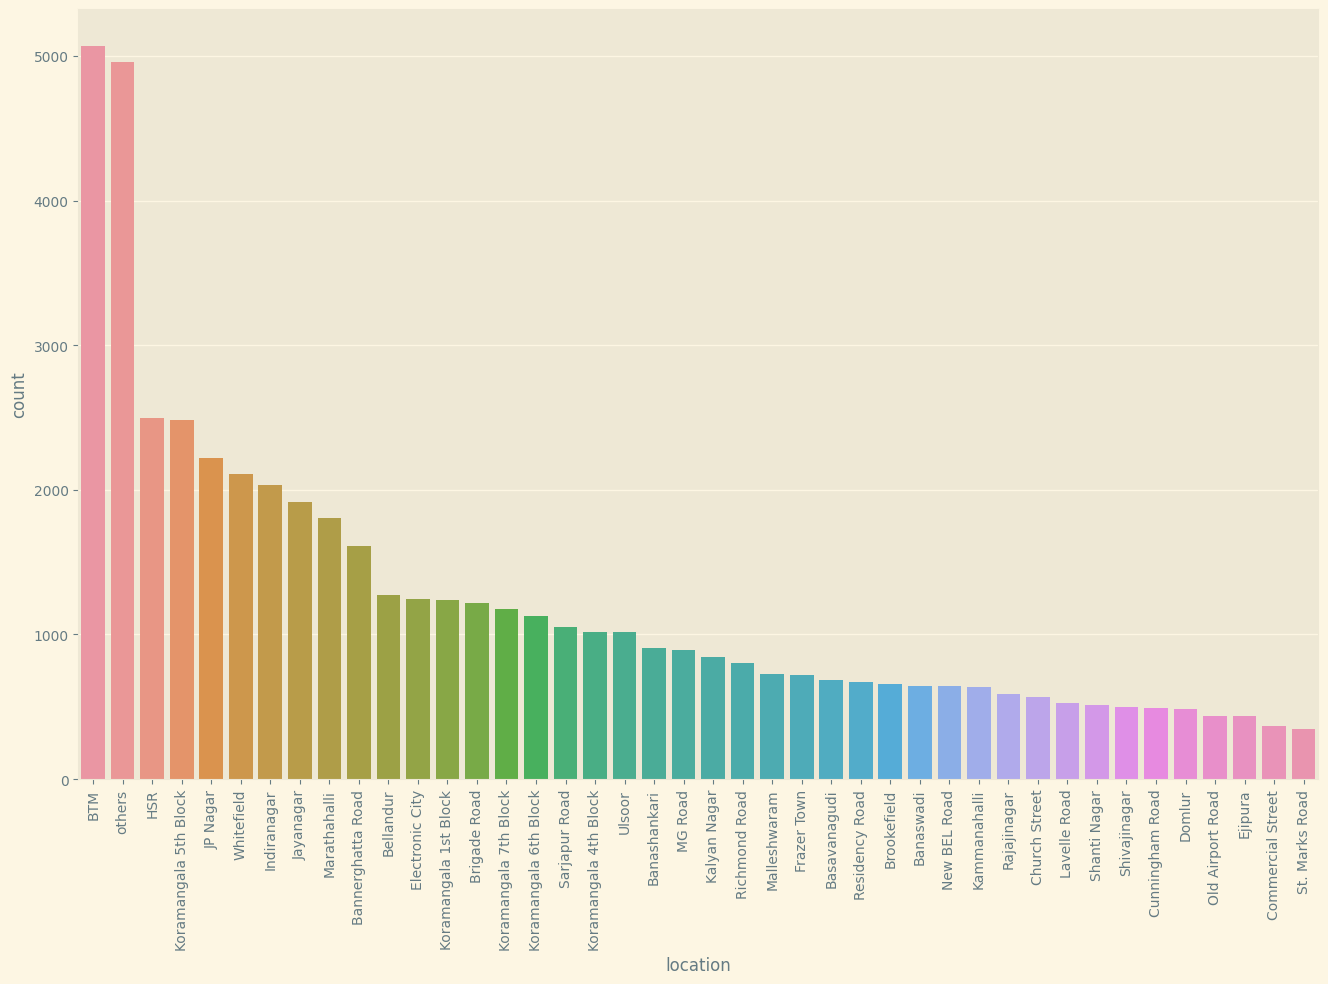

In [113]:
location_counts = zomato_df['location'].value_counts() #couldnt use countplot because datatype issue of the location
plt.figure(figsize=(16,10))
ax = sbn.barplot(x=location_counts.index, y=location_counts, order = location_counts.index)
#x-axis labels rotated 90° as they were mingled with each other
plt.xticks(rotation=90)

Now let's consider how many restraunts have the online order facility

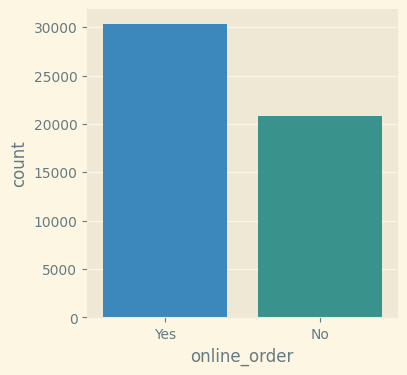

In [114]:
online_count = zomato_df['online_order'].value_counts()
plt.figure(figsize=(4,4))
ax = sbn.barplot(x = online_count.index,y=online_count)

Now let's consider how many restraunts have the booking table facility

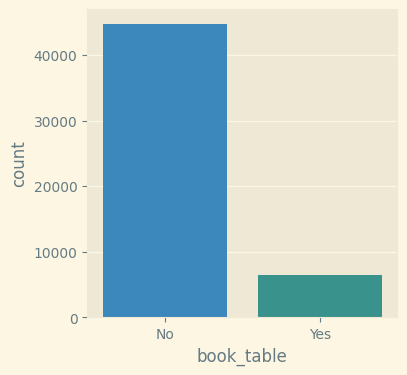

In [115]:
book_count = zomato_df['book_table'].value_counts()
plt.figure(figsize=(4,4))
ax = sbn.barplot(x = book_count.index, y = book_count)

lets see the relationship between online order facilty and rating

<Axes: xlabel='online_order', ylabel='rate'>

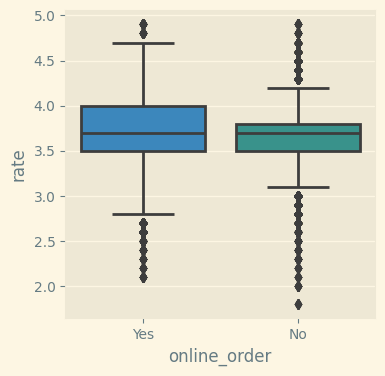

In [116]:
plt.figure(figsize=(4,4))
sbn.boxplot(x='online_order', y='rate', data = zomato_df)

let's see the relationship between rating and booking table faciltiy 

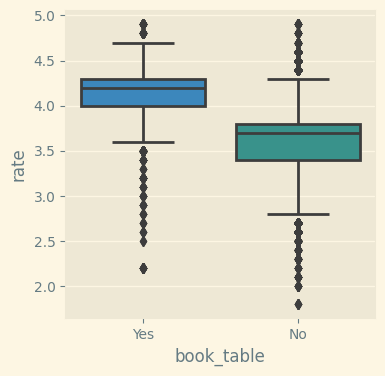

In [117]:
plt.figure(figsize=(4,4))
ax = sbn.boxplot(x='book_table', y='rate', data=zomato_df)

lets see the number of restraunts with online order feature or with absence of the feature, with respect to specific location.

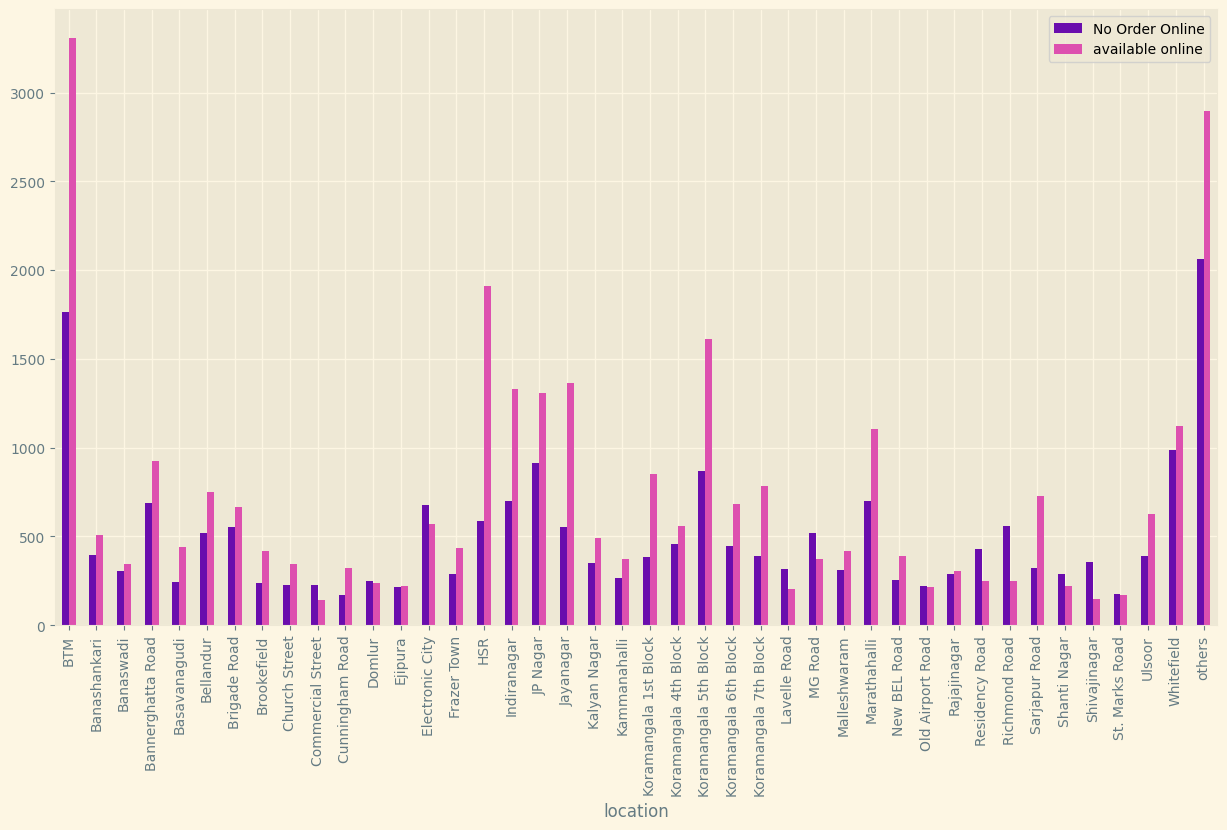

In [128]:
zomato_df1 = zomato_df.groupby(['location','online_order'])['name'].count()
zomato_df1.to_csv('location_online.csv')
zomato_df1 = pd.read_csv('location_online.csv')
zomato_df1 = pd.pivot_table(zomato_df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

#sbn.set_palette(colors) 

#colors = ["#6a0dad", "#dd50af"]  #darker color palette


zomato_df1.plot(kind='bar',figsize=(15,8),color = ["#6a0dad", "#dd50af"])
plt.xticks(rotation=90)

# Modify the legend labels
labels = ["No Order Online", "available online"]
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

Now lets see the number of restraunts having booking table feature based on location

<Figure size 1500x800 with 0 Axes>

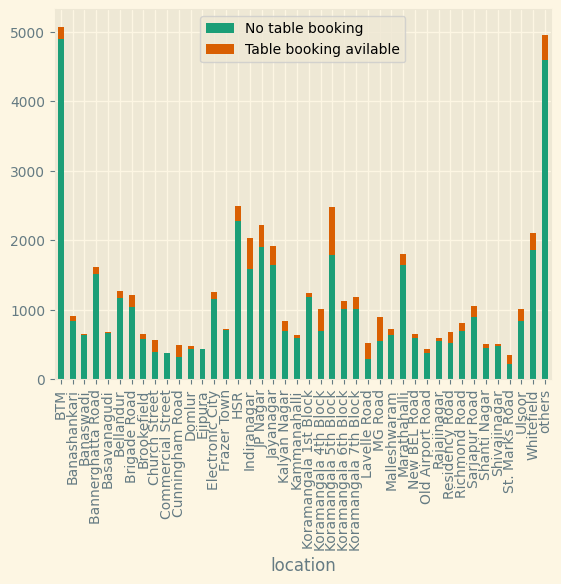

In [119]:

zomato_df2 = zomato_df.groupby(['location', 'book_table'])['name'].count()
zomato_df2.to_csv('book_table.csv')
zomato_df2 = pd.read_csv('book_table.csv')
zomato_df2 = pd.pivot_table(zomato_df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)

# Define a custom color palette
plt.figure(figsize=(15, 8))
colors = sbn.color_palette("Dark2", 2) # Example color palette
labels = ["No table booking", "Table booking avilable"]  # Custom legend labels

#plt.figure(figsize=(15, 8))
sbn.set_palette(colors)  # Set the custom color palette

zomato_df2.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)

# Modify the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.show()


Now's lets check the relationship between type of restraunts and rate

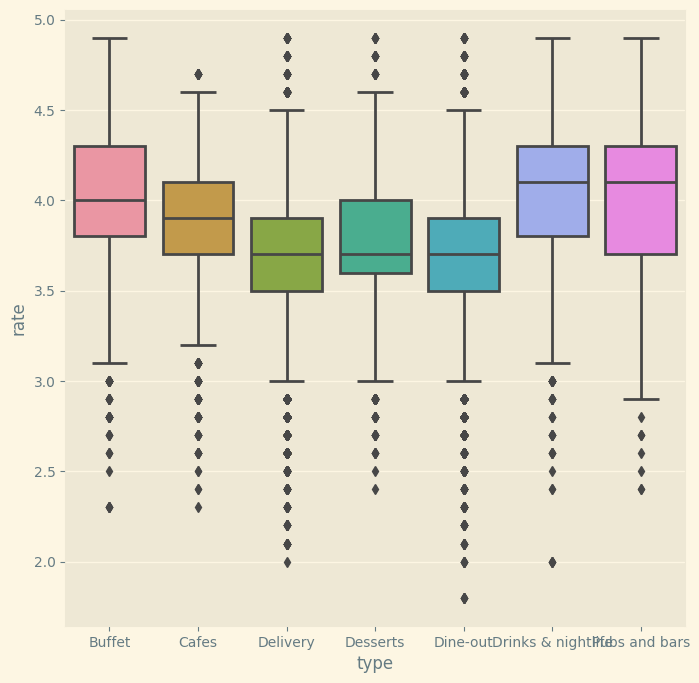

In [120]:
plt.figure(figsize=(8,8))
ax= sbn.boxplot(x='type',y='rate',data=zomato_df)


Now lets restraunt type distribution in each location

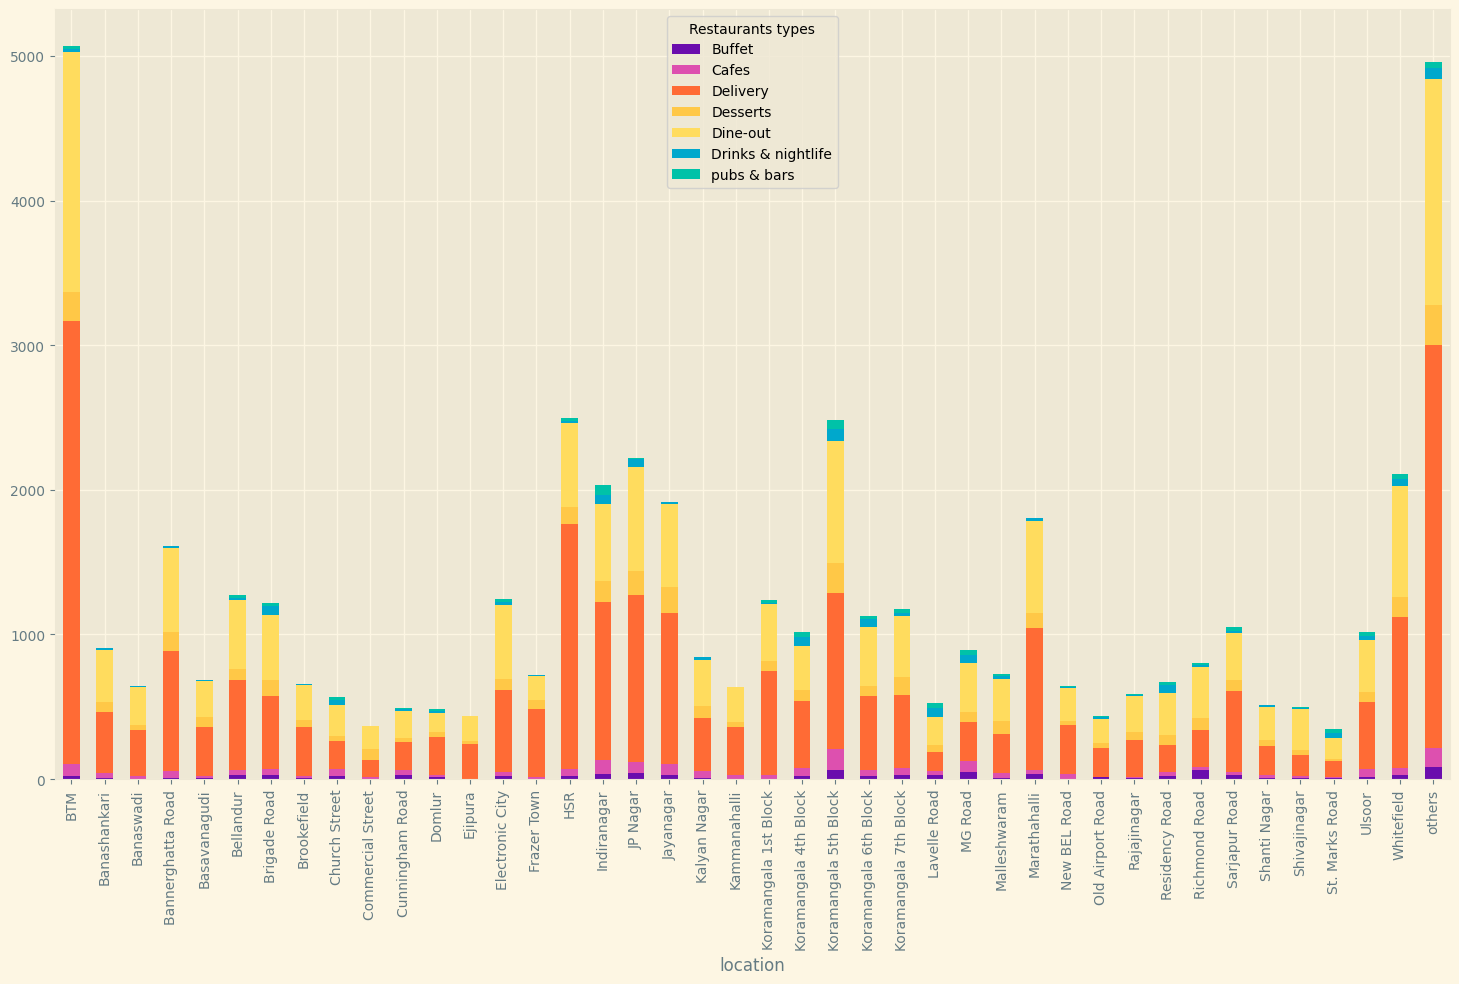

In [125]:
zomato_df3 = zomato_df.groupby(['location','type'])['name'].count()
zomato_df3.to_csv('location_type.csv')
zomato_df3 = pd.read_csv('location_type.csv')
zomato_df3 = pd.pivot_table(zomato_df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)

#creating a stacked graph
zomato_df3.plot(kind='bar',stacked= True,figsize=(18,10),color=['#6a0dad', '#dd50af', '#ff6b35', '#ffc847', '#ffdc5e', '#00a8cc', '#00c2a8'])
plt.xticks(rotation=90)

# Modify the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Buffet', 'Cafes', 'Delivery','Desserts','Dine-out','Drinks & nightlife','pubs & bars']  
legend_title = 'Restaurants types' 

plt.legend(handles, labels, title=legend_title)

plt.show()


In [122]:
zomato_df3

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3066      198     1662   
Banashankari               7    36      419       71      357   
Banaswadi                  0    24      313       37      264   
Bannerghatta Road          9    46      828      137      580   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      620       75      479   
Brigade Road              25    46      504      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      196       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      195       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      246       16      172   
Electronic City           23    24      572       71      516   
Frazer Town                1    11      476       56      172   
HSR                       19    49     1696      120      580   
Indiranagar               38    97     1093      140      532   
JP Nagar                  45    76     1152      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      330       35      240   
Koramangala 1st Block      3    26      717       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1076      209      843   
Koramangala 6th Block     18    43      513       70      411   
Koramangala 7th Block     25    52      504      127      417   
Lavelle Road              30    27      129       50      193   
MG Road                   51    76      267       68      343   
Malleshwaram              11    31      272       85      291   
Marathahalli              34    32      980      105      631   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      188       63      290   
Richmond Road             63    21      258       78      356   
Sarjapur Road             26    22      558       82      319   
Shanti Nagar               9    22      201       39      229   
Shivajinagar               6    17      144       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      462       71      359   
Whitefield                28    51     1045      137      768   
others                    84   133     2788      276     1559   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          58            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

Now let's find out which location has the most number of votes registered in the application

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

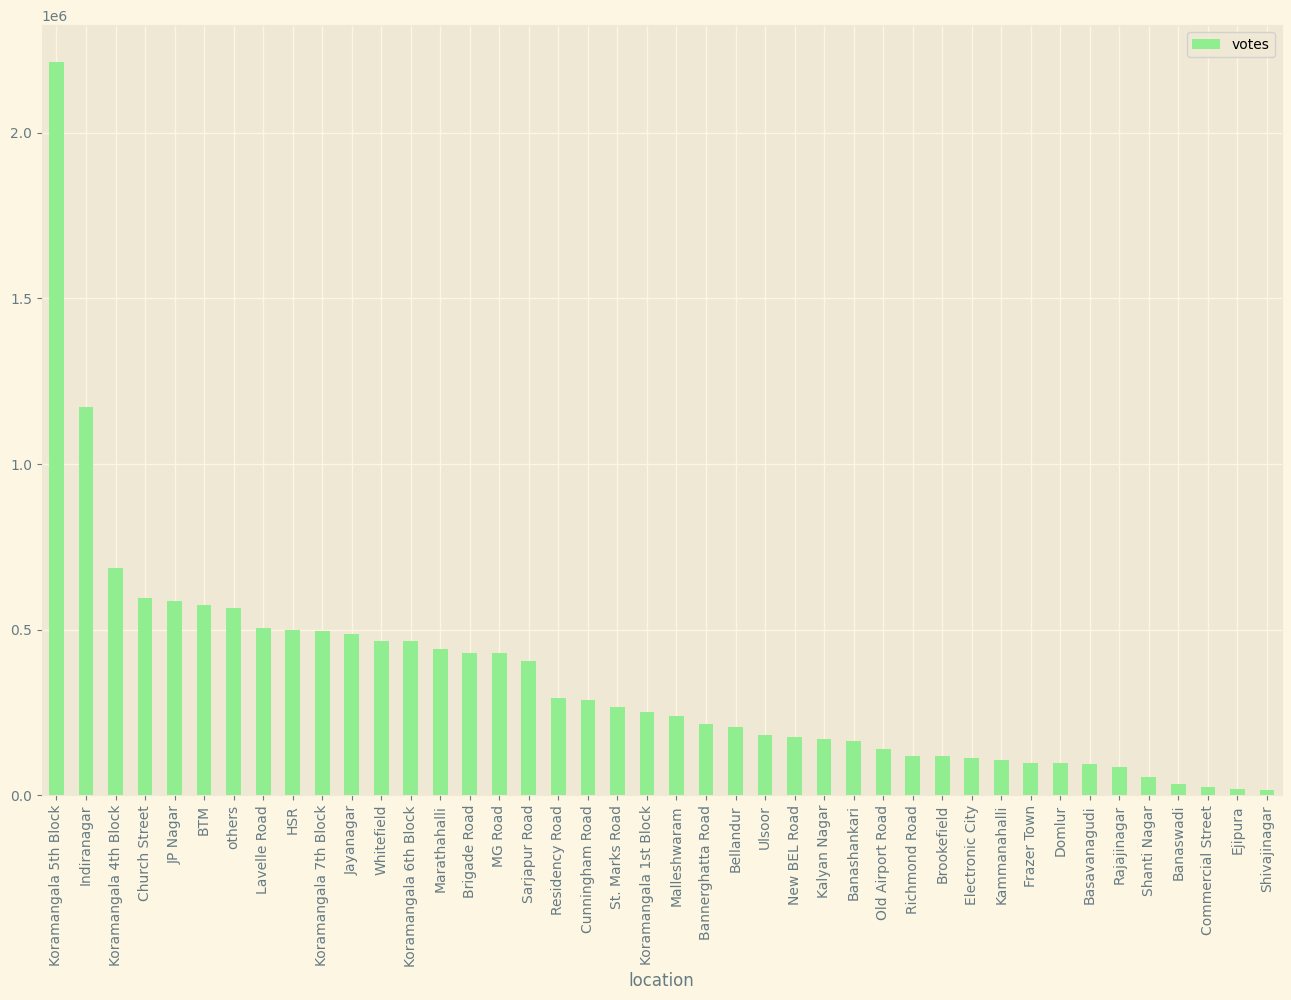

In [123]:
zomato_df4 = zomato_df[['location', 'votes']]
zomato_df4.drop_duplicates()
zomato_df5 = zomato_df4.groupby(['location'])['votes'].sum()
zomato_df5 = zomato_df5.to_frame()
zomato_df5 = zomato_df5.sort_values('votes', ascending=False)
#plotting the graph
zomato_df5.plot(kind='bar',figsize=(16,10),color='lightgreen')
plt.xticks(rotation = 90)


Now lets find which cuisines are in demand based on the votes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

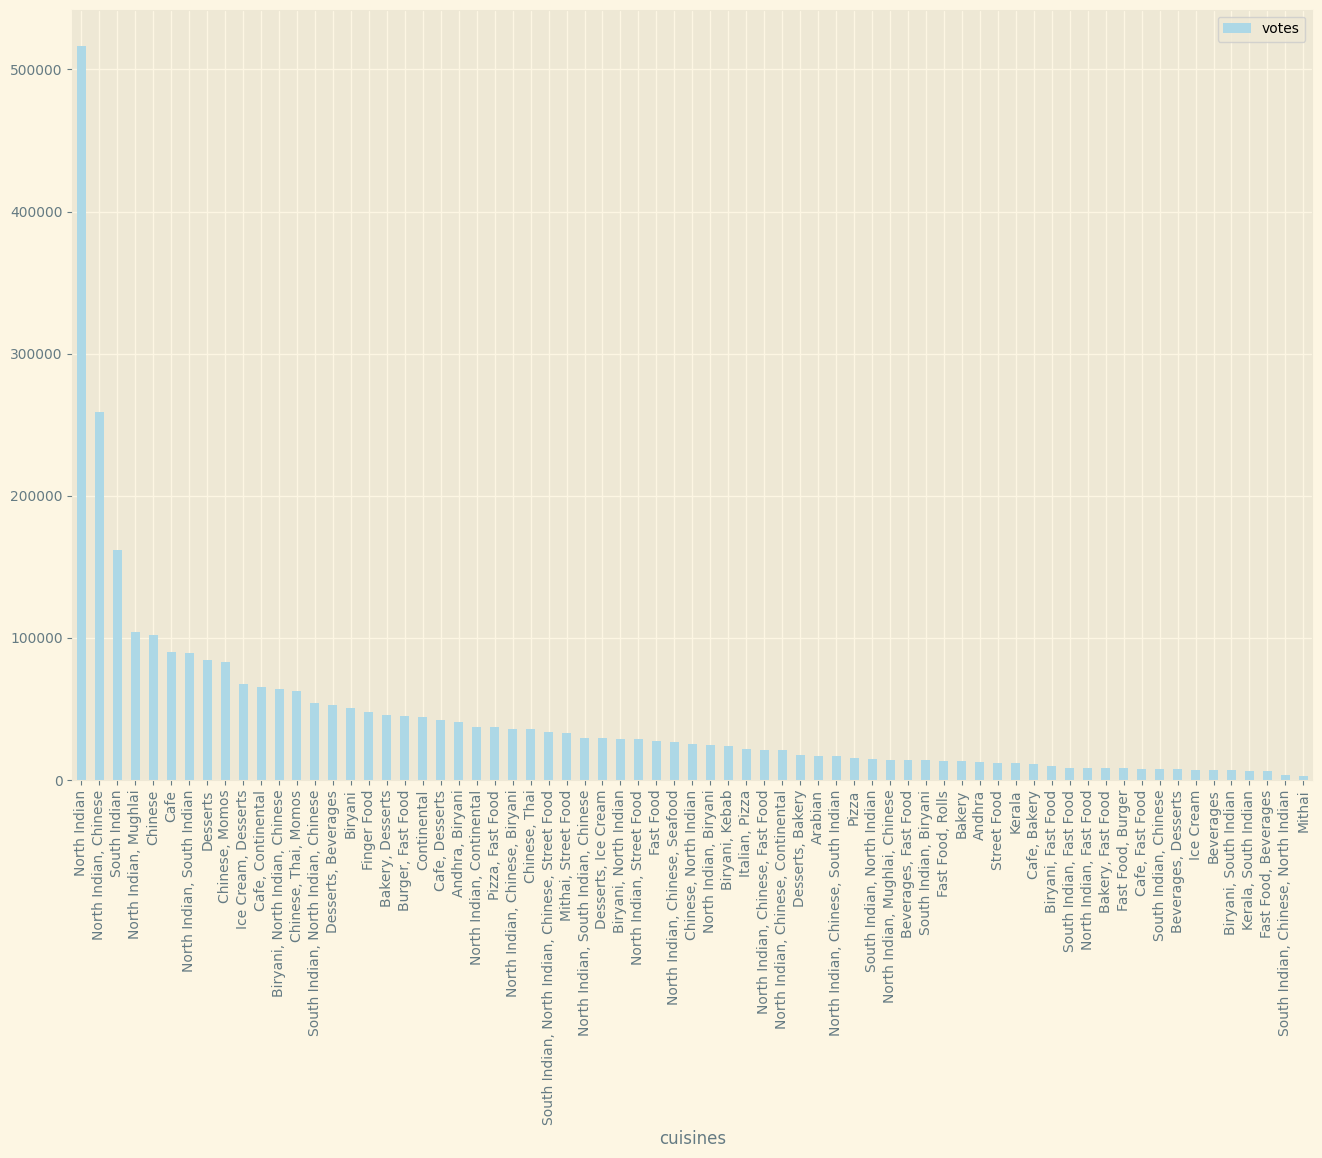

In [124]:
zomato_df6 = zomato_df[['cuisines', 'votes']]
zomato_df6.drop_duplicates()
zomato_df7 = zomato_df6.groupby(['cuisines'])['votes'].sum()
zomato_df7 = zomato_df7.to_frame()
zomato_df7 = zomato_df7.sort_values('votes', ascending=False)
zomato_df7 = zomato_df7.iloc[1:, :] #to remove others from the list which is in index 0, this makes the list to constinue fron index 1
#plotting the graph
zomato_df7.plot(kind='bar',figsize=(16,10),color='lightblue')
plt.xticks(rotation = 90)